#Imports

In [ ]:
# data ETL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q kaggle #to import Kaggle dataset
import calendar


# ML suff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


# metrics
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

#Load data from Kaggle 

dataset `amazon.csv` and columns description => https://www.kaggle.com/elikplim/forest-fires-data-set

In [ ]:
#make directory to store kaggle credintials
!mkdir -p ~/.kaggle 

In [ ]:
%%writefile ~/.kaggle/kaggle.json

{"username":"crunchykitkat","key":"7583e6a099f31708da004a8b2105a9ae"}

Writing /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d elikplim/forest-fires-data-set

  0% 0.00/7.10k [00:00<?, ?B/s]
100% 7.10k/7.10k [00:00<00:00, 5.93MB/s]


In [ ]:
!unzip forest-fires-data-set.zip

Archive:  forest-fires-data-set.zip
  inflating: forestfires.csv         


# Load data into dataframe

In [ ]:
df = pd.read_csv('forestfires.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.describe(include = 'all')
# FFMC The Fine Fuel Moisture Code
# DMC deep moist convection
# ISI Initial Spread Index
# RH relative humidity 


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


Temperature attributes are described in code names, according to fire weather index system => https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system#TOC-Fire-Weather-Index-NFDRS-Crosswalk



# Data EDA

In [ ]:
# Calculating missing data in feature columns
data_mis = (df.isnull().sum() / len(df))
data_mis 

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64

dataset contains 0 NULLS

In [ ]:
#replace months names and days to numbers 
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc130e27400>,
      dtype=object)

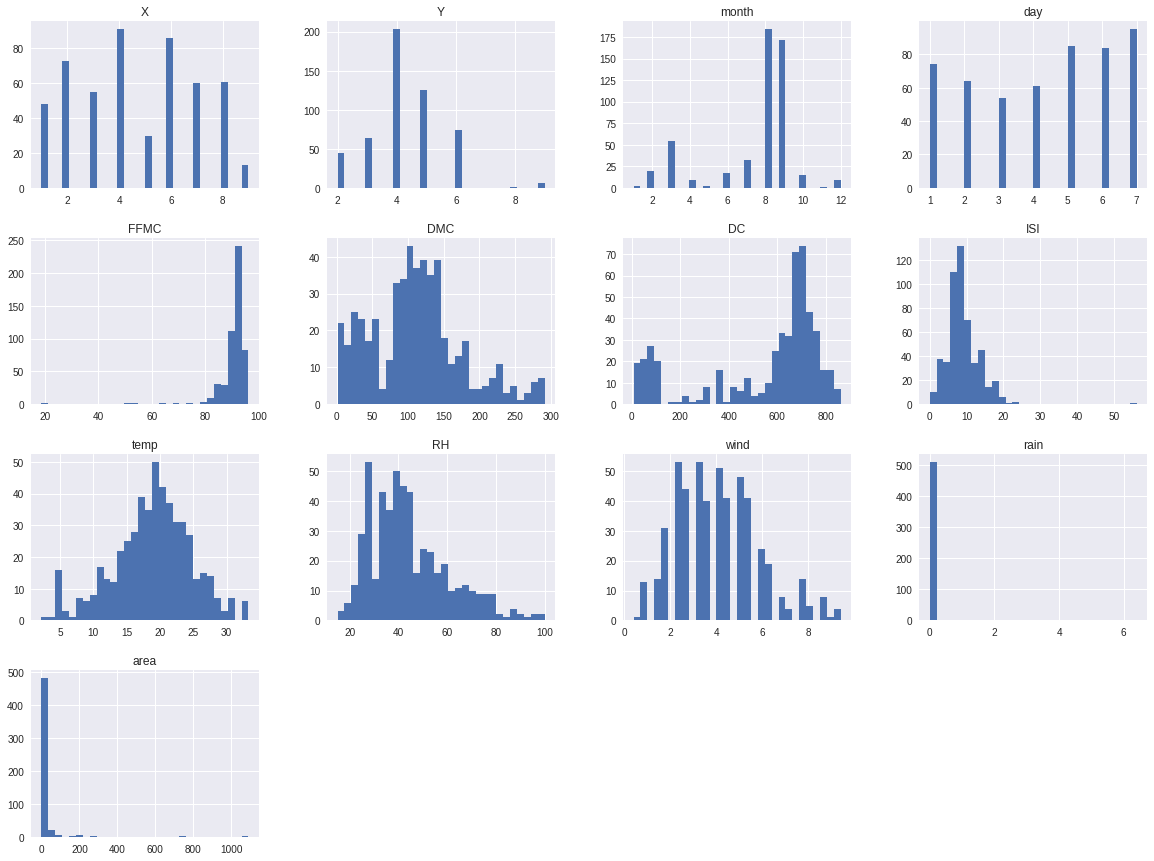

In [ ]:
#plot histograms for each feature in data, using seaborn style
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


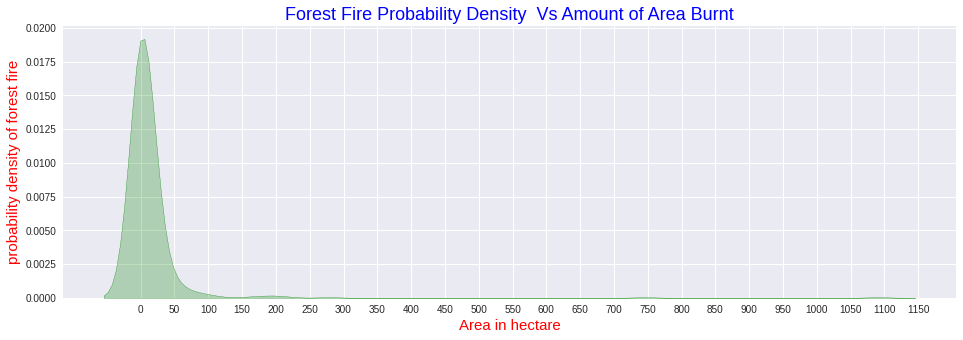

In [ ]:
# graphing the distribution of the fires area
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xlabel('Area in hectare',color='red',fontsize=15)
plt.ylabel('probability density of forest fire',color='red',fontsize=15)
plt.title('Forest Fire Probability Density  Vs Amount of Area Burnt',color='blue',fontsize=18)
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [ ]:
print("Skew: \n{}".format(df.skew()))

Skew: 
X         0.036246
Y         0.417296
month    -1.218012
day      -0.212969
FFMC     -6.575606
DMC       0.547498
DC       -1.100445
ISI       2.536325
temp     -0.331172
RH        0.862904
wind      0.571001
rain     19.816344
area     12.846934
dtype: float64


As seen, rain and burned areas are left skewed, this may require normal scaling later 

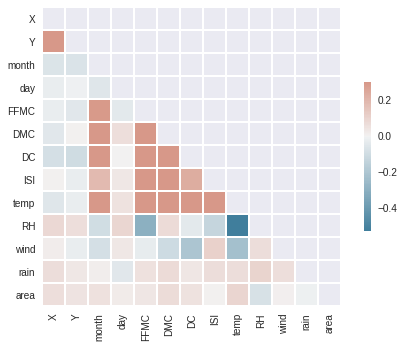

In [ ]:
#plot diagonal correlation heatmap

corr = df.corr() #features correlation in dataset
mask = np.triu(np.ones_like(corr, dtype=bool)) #mask to hide the upper diagonal of the matrix 
cmap = sns.diverging_palette(230, 20, as_cmap=True) #plot's color map (blue to pink gradiant)
sns.heatmap(corr, cmap=cmap,mask = mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #plot heatmap 

In [ ]:
df.corr()['area'].sort_values(ascending=False)

area     1.000000
temp     0.097844
DMC      0.072994
X        0.063385
month    0.056496
DC       0.049383
Y        0.044873
FFMC     0.040122
day      0.023226
wind     0.012317
ISI      0.008258
rain    -0.007366
RH      -0.075519
Name: area, dtype: float64

As seen in heatmap above:
1. Fire weather indices (FFMC, DMC, DC, ISI) correlate mainly with month (seasonal)
2. Fire weather indicies intercorrelate with each other
3. Burned area correlate mostly with the temperature, then DMC



Text(0.5, 1.0, 'scatter plot for the locations of burned area')

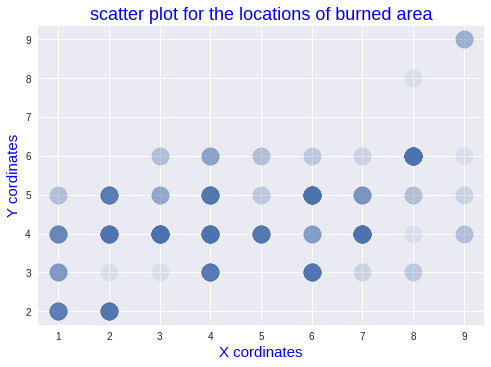

In [ ]:
df.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the locations of burned area
plt.xlabel('X cordinates',color='blue',fontsize=15)
plt.ylabel('Y cordinates',color='blue',fontsize=15)
plt.title('scatter plot for the locations of burned area',color='blue',fontsize=18)

Text(0.5, 1.0, 'increase burned area bubble size by `area` parameter ')

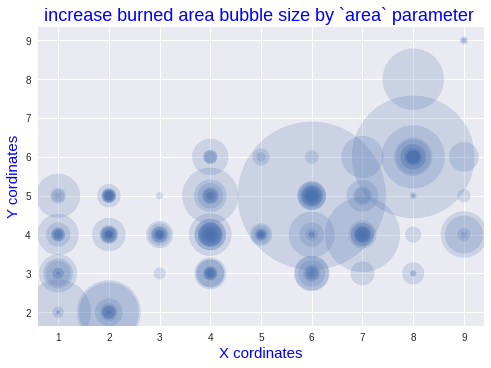

In [ ]:
#increase burned area bubble size by `area` parameter 
df.plot(kind='scatter', x='X', y='Y', alpha=0.2, s= 20 * df['area']) 
plt.xlabel('X cordinates',color='blue',fontsize=15)
plt.ylabel('Y cordinates',color='blue',fontsize=15)
plt.title('increase burned area bubble size by `area` parameter ',color='blue',fontsize=18)

Most damaged area is (6,5), by frequency and affected area size

In [ ]:
df['area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

Text(0, 0.5, 'Affected Area Size')

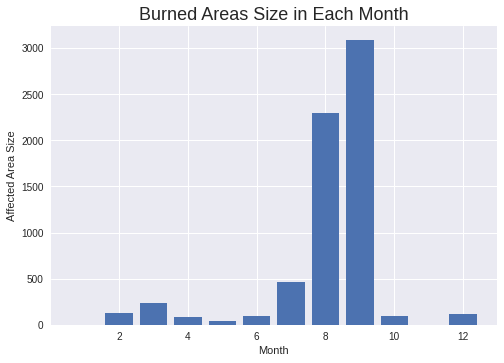

In [ ]:
plt.bar(df.groupby('month').sum().index, df.groupby('month').sum()['area'])
plt.title('Burned Areas Size in Each Month', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Affected Area Size')

Text(0, 0.5, 'DMC')

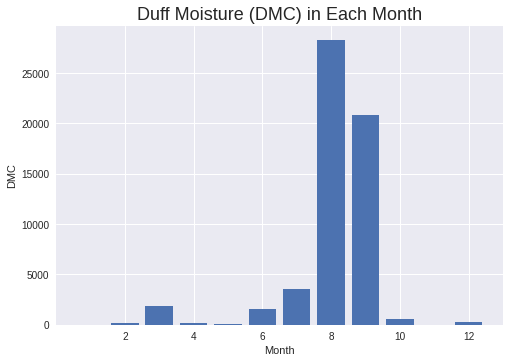

In [ ]:
plt.bar(df.groupby('month').sum().index, df.groupby('month').sum()['DMC'])
plt.title('Duff Moisture (DMC) in Each Month', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('DMC')

As the last 2 plots demonstrate, there is a strong correlation between affected areas size and Duff Moisture metric. Which was mainly deduced from correlation heatmap above.

**Weather Observations:**


1.   Rain Rainfall only in these months:aug,july and mar which is even very less in amount.

Months receving no rainfall is more of a dangerous conditions with respect to rainfall prospective.

2.   Temp june,july,aug,sep,oct has high temp
3.   Wind wind is low in jan,feb,july,sep,oct
4.   Relative Humidity we see humidity is also low in sep oct nov dec
5.   DC value high in july,aug,sep,oct more dry in that month
6.   DMC value high in july ,aug,sep but not in oct
7.   FFMC value high above 90 in aug,july,sep,oct
8.   ISI value high in june july aug,sep Forest Fire Prediction
9.   Month having no rainfall is more prone to catch forest fire
10.  When temp is increasing the moisture content of all 3 different types of fuel is reduced in the same month, so more dangerous conditions have occured in the months of july,aug,sep,oct from temp prospective
11.  Also we can see that DMC and DC value have no significant relations with wind and Relative humidity columns
12.  Months having low humidity is more prone to catch forest fire.

















In [ ]:
areaburnt=df[df['area']>0]
areaburnt

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,8,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29


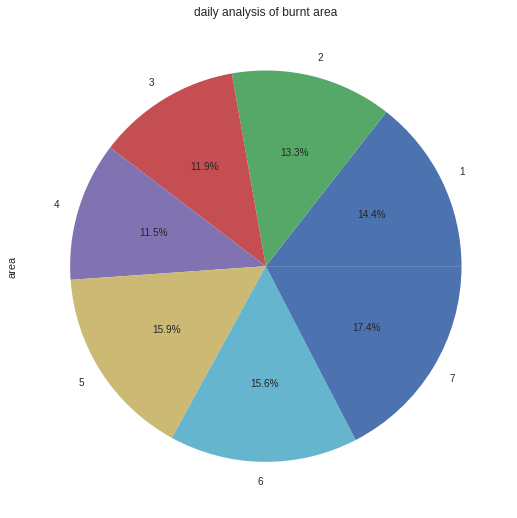

In [ ]:
areaburnt.groupby('day')['area'].agg('count').plot(kind='pie',title='daily analysis of burnt area',figsize=(9,9),explode=[0,0,0,0,0,0,0],autopct='%0.1f%%')
plt.show()

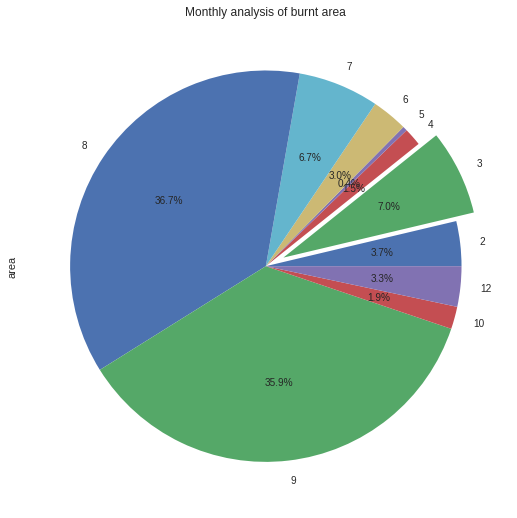

In [ ]:
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0],autopct='%0.1f%%')
plt.show()

Observations:

1. It is interesting to see that abnormally high number of the forest fires occur in the month of August and September amd least in Nov.

2. In the case of day, the days saturday - sunday have higher proportion of cases. (However, no strong indicators)

#Checking for outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


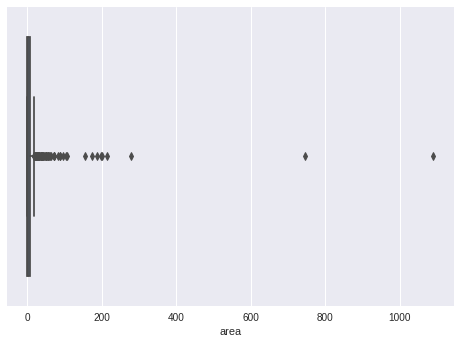

In [ ]:
target = 'area' 
outl_dect = sns.boxplot(df[target])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


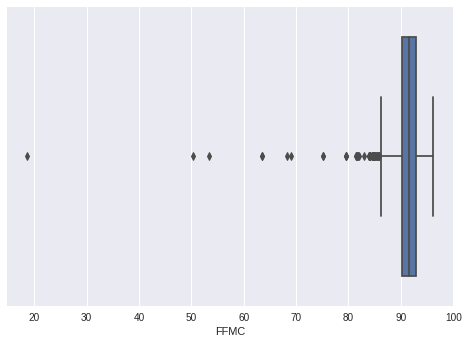

In [ ]:
outl_dect = sns.boxplot(df['FFMC'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


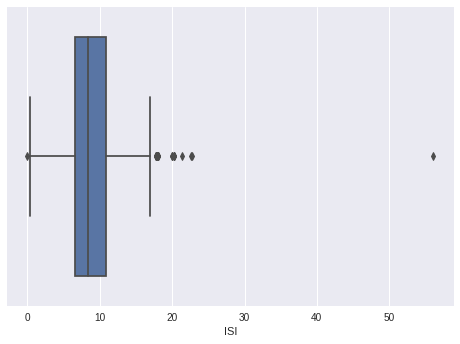

In [ ]:
outl_dect = sns.boxplot(df['ISI'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


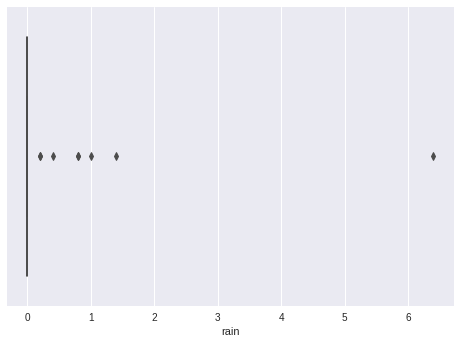

In [ ]:
outl_dect = sns.boxplot(df['rain'])

Outlier analysis
Outliers are found in the following columns:

1. area
2. FFMC
3. ISI
4. rain

Instead of removing them we will transform the data to treat the outliers.

In [ ]:
outlier_columns = ['area','FFMC','ISI','rain']

In [ ]:
np.log1p(df[outlier_columns]).skew()

area     1.217838
FFMC   -11.675394
ISI     -0.937218
rain    14.173028
dtype: float64

In [ ]:
np.log1p(df[outlier_columns]).kurtosis()

area      0.945668
FFMC    185.482383
ISI       2.584588
rain    234.240025
dtype: float64

Even after transformation we still have high skewness and kurtosis in FFMC & rain

Removing outliers by zscore method

In [ ]:
mask = df.loc[:,['FFMC']].apply(zscore).abs() < 3

In [ ]:
df = df[mask.values]
df.shape

(510, 13)

#Using standard scaler and splitting the dataset 

In [ ]:
df2 = df.copy()

scaler = StandardScaler()

dataset = df2.values
X = dataset[:,0:12] #12 features of the dataset 
y = dataset[:,12] #the target which is the area

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42) #splitting the dataset into trainig and testing sets

#applying the scaling on the (X) dataset 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# **Results before PCA**

In [ ]:
def Reg_model_(X_train1, X_test1, y_train1, y_test1, reg):
  name_reg , model_reg = reg


  model_reg.fit(X_train1, y_train1)

  y_pred_test = model_reg.predict(X_test1)

  #Evaluate the model
 
  mse = metrics.mean_squared_error(y_test1, y_pred_test)
  mae = mean_absolute_error(y_pred_test, y_test1)
  r2 = metrics.r2_score(y_test1, y_pred_test)
  #r1 = model.score(X_test,y_test)
  print(name_reg+' performance: ')
  print("--------------------------------------")
  print('Mean absolute error is {}'.format(mae))
  print('Mean Squared error is {}'.format(mse))
  print('R2 score is {}'.format(r2)) 
  return model_reg

#The coefficient R^2 is defined as ( 1- (u/v) ),where (u) is 
#the residual sum of squares ((y_true - y_pred) ** 2).sum() and (v) is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()



In [ ]:
regressor_linear = Reg_model_(X_train, X_test, y_train, y_test,('Linear Regression', LinearRegression()))  #Linear regression performance on the dataset before applying PCA

Linear Regression performance: 
--------------------------------------
Mean absolute error is 21.843976038941545
Mean Squared error is 5412.0562876219265
R2 score is 0.021740010207839666


In [ ]:
#Multi-layer Perceptron regression performance on the dataset before applying PCA

regressor_nn = Reg_model_(X_train, X_test, y_train, y_test,("Multi-layer Perceptron regressor",MLPRegressor(hidden_layer_sizes=(16, 16))))

Multi-layer Perceptron regressor performance: 
--------------------------------------
Mean absolute error is 18.98383371485508
Mean Squared error is 5396.569692236739
R2 score is 0.024539300503115924


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#A function for evaluating classification models 
def class_model_(X_train2, X_test2, y_train2, y_test2, c):
  name , model = c
  y_train2[y_train2 > 0] = 1
  y_test2[y_test2 > 0] = 1
  
  model.fit(X_train2, y_train2)
  y_pred_test1 = model.predict(X_test2)

  score = model.score(X_test2, y_test2) * 100
  print(name+ " Accuracy: {:.2f}%".format(score))
  return model

In [ ]:
#Logistic regression performance on the dataset before applying PCA
classifier_log = class_model_(X_train, X_test, y_train, y_test,("Logistic Regression",LogisticRegression()))

Logistic Regression Accuracy: 55.88%


In [ ]:
#Multi-layer Perceptron classifier performance on the dataset before applying PCA

classifier_nn = class_model_(X_train, X_test, y_train, y_test, ("MLP classifier",MLPClassifier(hidden_layer_sizes=(16, 16))))

MLP classifier Accuracy: 57.84%


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **PCA**

Text(0, 0.5, 'cumulative explained variance')

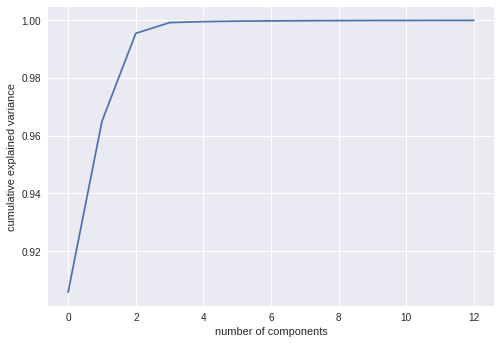

In [ ]:
#looking at the cumulative explained variance ratio as a function of the number of components
pca = PCA().fit(df2)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##cumulative exp var is approxiametly 100% when no. of PCA components is 3


In [ ]:
pca_ = PCA(n_components=3)

#Transforming x_train and x_test 
X_train_pca = pca_.fit_transform(X_train)

X_test_pca = pca_.transform(X_test)


# **Results after PCA**

# *Regression* 

# Linear Regression

In [ ]:

regressor_linear_pca = Reg_model_(X_train_pca, X_test_pca, y_train, y_test, ('Linear Regression', LinearRegression()))


Linear Regression performance: 
--------------------------------------
Mean absolute error is 0.4934948865031479
Mean Squared error is 0.24797294326038463
R2 score is 0.0077267301226762175


# MLP Regressor

In [ ]:
regressor_nn_pca = Reg_model_(X_train_pca, X_test_pca, y_train, y_test,("NN Regression", MLPRegressor(hidden_layer_sizes=(15, 30))))

NN Regression performance: 
--------------------------------------
Mean absolute error is 0.5065894834558649
Mean Squared error is 0.26984273233166495
R2 score is -0.07978607199178533


# Classification 

# Logistic Regression

In [ ]:
#Logistic regression model after applying PCA with three components only 
classifier_log_pca = class_model_(X_train_pca, X_test_pca, y_train, y_test,("Logistic Regression",LogisticRegression()))

Logistic Regression Accuracy: 53.92%


# MLP Classifier

In [ ]:
#Multi-layer perceptron model after applying PCA with three components only 
classifier_nn_pca = class_model_(X_train_pca, X_test_pca, y_train, y_test,("MLP classifier",MLPClassifier(hidden_layer_sizes=(16, 16))))

MLP classifier Accuracy: 55.88%


# **Prediction** using classifier and regressor 

In [ ]:
# Predict the data if it's zero or one using neural network classifier 
y_pred_class = classifier_nn.predict(X_test) 

In [ ]:
#filtering the data that had fires and predict using neural network regressor 
X_test_reg = X_test[y_pred_class == 1]
y_pred_reg = regressor_nn.predict(X_test_reg) 

In [ ]:
#predicting the data that had fire 
y_pred_class[y_pred_class==1] = y_pred_reg
y_final = y_pred_class

In [ ]:
#the mean squared error of the final predictions using classifier and regressor
y_final
metrics.mean_squared_error(y_test, y_final)

155.06167301320454